# Module 4 Assesment: Breast Cancer Campaign

# Read the Dataset

In [ ]:
# Read the dataset into a Pandas Dataframe.
import pandas as pd
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# Does the dataset include any missing values? 
print(df.isnull().sum(axis = 0))
before_drop = df.shape
print('Shape Before NA Drop: ', before_drop)
df.dropna
after_drop = df.shape
print("Shape After NA Drop: ", after_drop)
if before_drop == after_drop:
    print("No NA Values detected")
else:
    print("NA Values have been dropped")

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Shape Before NA Drop:  (1338, 7)
Shape After NA Drop:  (1338, 7)
No NA Values detected


In [3]:
print(df['sex'].value_counts())
print(df['children'].value_counts())
print(df['region'].value_counts())
print(df['age'].value_counts())
print(df['smoker'].value_counts)

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>


# Perform Preprocessing
Perform any needed pre-processing on the chosen features including: Scaling, Encoding, Dealing with Nan values, Normalization

In [4]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex'] = encoder.transform(df['sex'])

encoder.fit(df['smoker'])
df['smoker'] = encoder.transform(df['smoker'])

region = pd.get_dummies(df.iloc[:, 5], dtype= int)
target = df['charges']
df.drop(['region', 'charges'], axis = 1, inplace=True)
df_features = pd.concat([df, region], axis = 1)
df_features

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


# Prepare Visualization
You are required to deliver a number of visualization for your dataset, including: Pair Plots for the features, Correlation Matrix heat map, Box plots for the features.

<Figure size 1000x600 with 0 Axes>

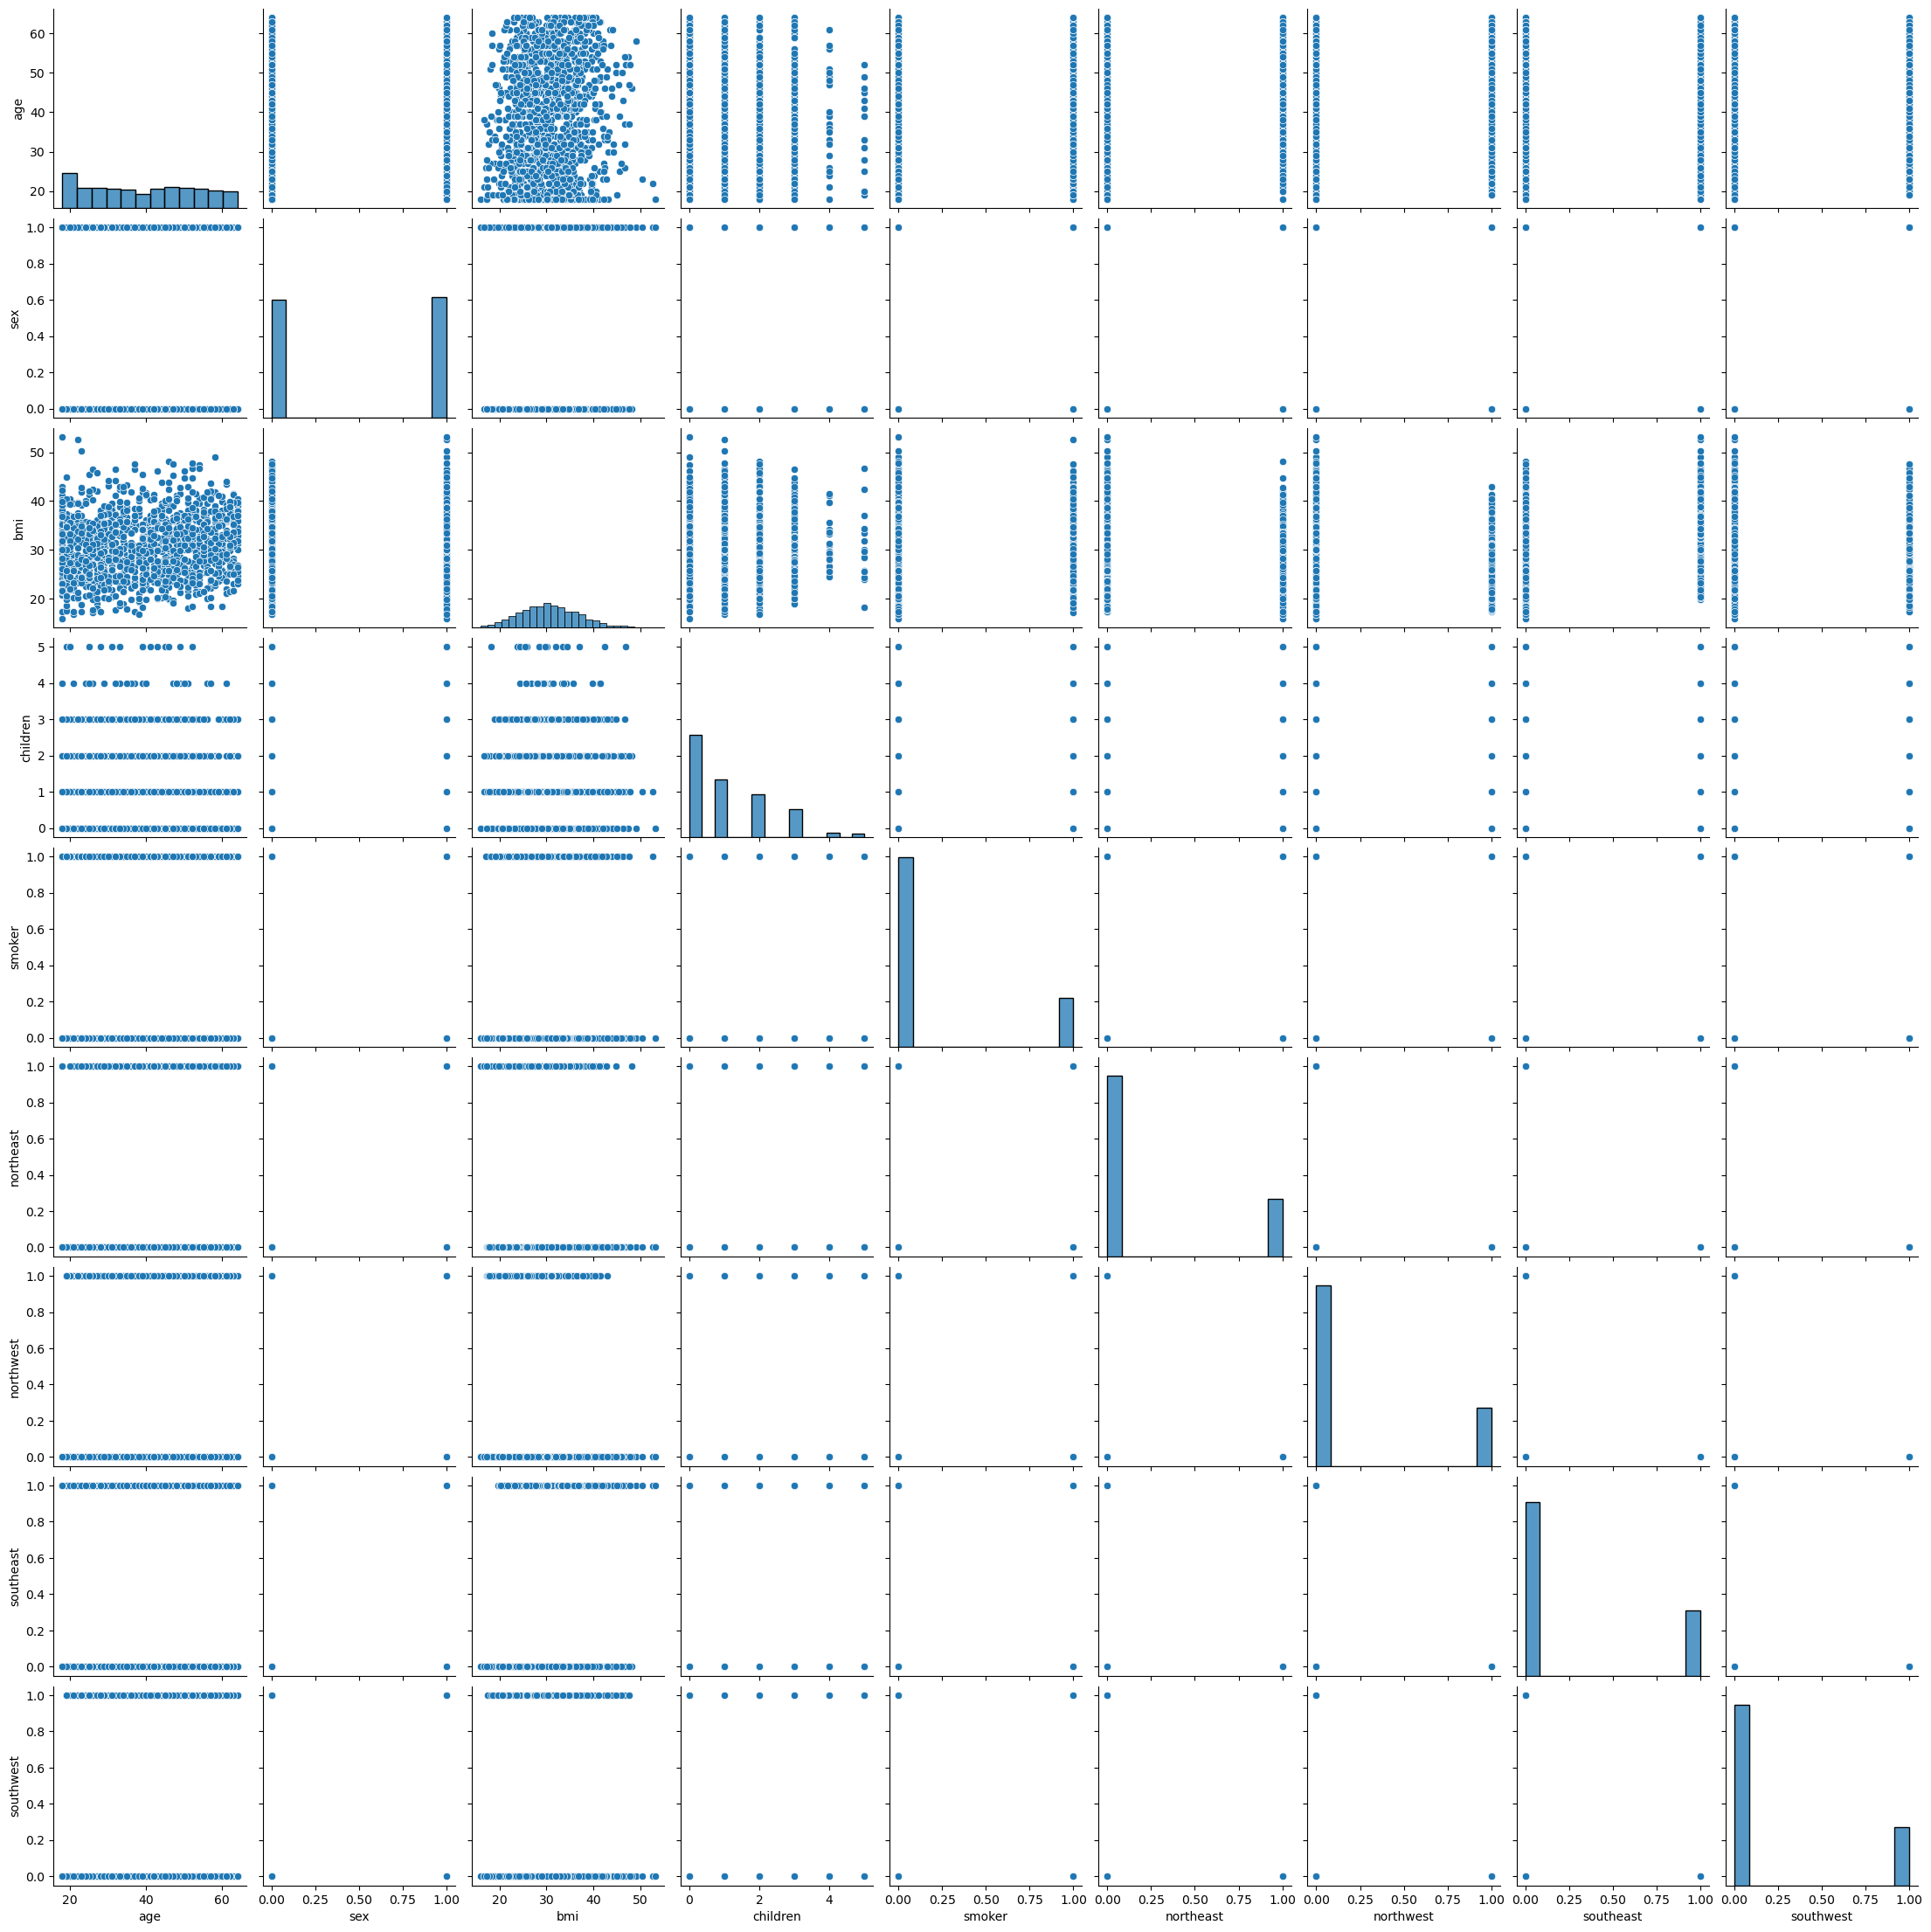

In [5]:
# Pair Plots
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.pairplot(df_features.iloc[:, 0:])
#pd.plotting.scatter_matrix(df.iloc[:, 1:],alpha=0.1)

<Axes: >

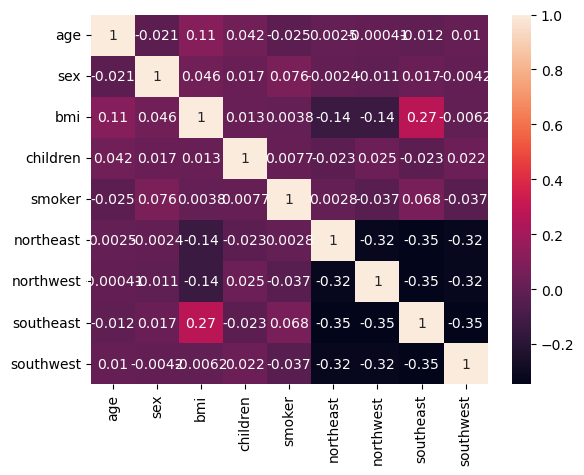

In [6]:
# Heat Map
sns.heatmap(df_features.corr(), annot = True)

<Axes: >

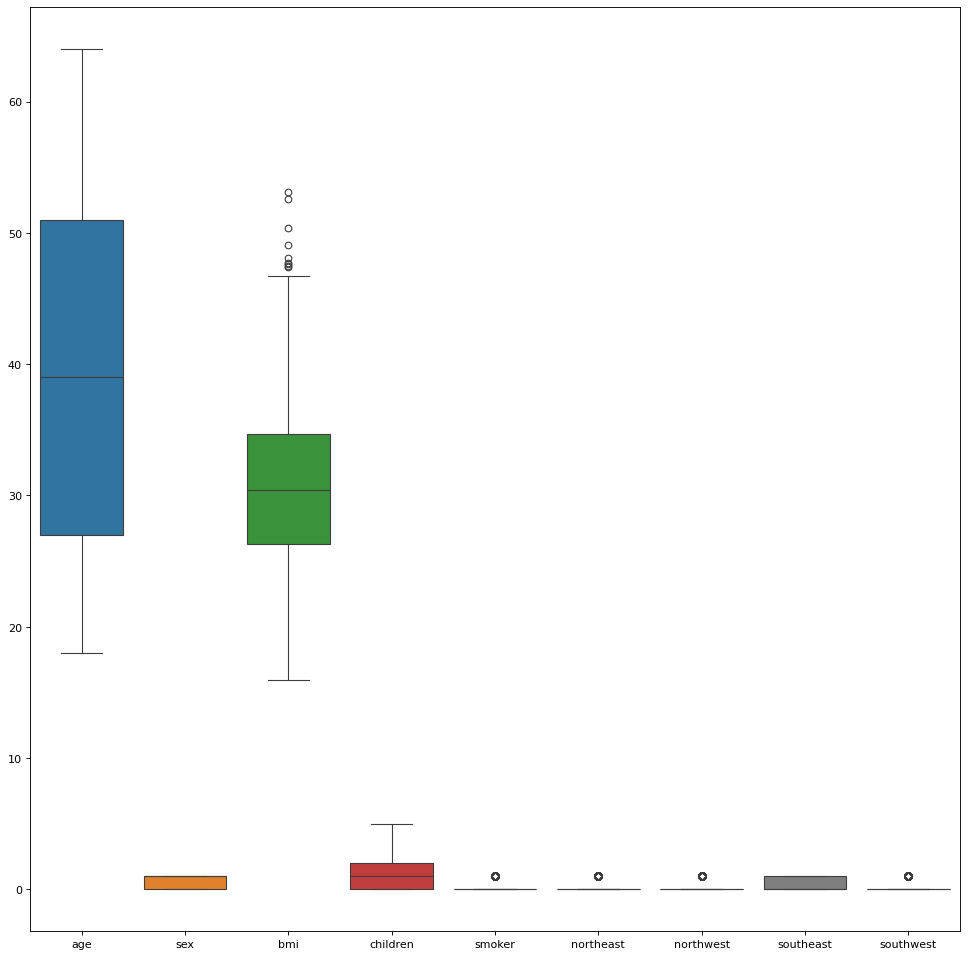

In [7]:
# Box Plot
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
sns.boxplot(data= df_features)

# Split the data

In [8]:
# 80% training set, 10% validation set, 10% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=0) # split the data to a test set by 20% using 0.2
X_validate, X_test, y_validate, y_test = train_test_split(df_features,target, test_size=0.5, random_state=0) # split the test set by %50 using 0.5 

# Train Regressor
Use decision trees, random forests and support vector regressions (SVRs) to fit your data.
#
Get r2 scores, mean square error (MSE) scores and mean absolute error (MAE) scores. You need a minimum r2 score of 82%
#
Compare the results of different models. Hint: You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.

In [9]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
modelDT = DecisionTreeRegressor(criterion='squared_error',random_state=0)
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
scoreDT = modelDT.score(X_test,y_test)
print(scoreDT)
print('MSE: ' + str(mean_squared_error(y_test, y_predDT)))
print('MAE: ' + str(mean_absolute_error(y_test,y_predDT)))
print('r2_score: '+str(r2_score(y_test, y_predDT)))


0.8798744414110082
MSE: 17750226.57115385
MAE: 1288.9896080254111
r2_score: 0.8798744414110082


In [10]:
# Random Forrest
from sklearn.ensemble import RandomForestRegressor
modelFR = RandomForestRegressor(criterion='squared_error',random_state=0)
modelFR.fit(X_train, y_train)
y_predFR = modelFR.predict(X_test)
scoreFR = modelFR.score(X_test,y_test)
print(scoreFR)
print('MSE: ' + str(mean_squared_error(y_test, y_predFR)))
print('MAE: ' + str(mean_absolute_error(y_test,y_predFR)))
print('r2_score: '+str(r2_score(y_test, y_predFR)))

0.9327923658434919
MSE: 9930865.23469085
MAE: 1659.36547563867
r2_score: 0.9327923658434919


In [11]:
# SVM
from sklearn.svm import SVR
modelSVR = SVR(C=1, kernel='poly',gamma='auto',epsilon=0.3,degree=3)
modelSVR.fit(X_train, y_train)
y_predSVR = modelSVR.predict(X_test)
print(modelSVR.score(X_test, y_predSVR))
print('MSE: ' + str(mean_squared_error(y_test, y_predSVR)))
print('MAE: ' + str(mean_absolute_error(y_test,y_predSVR)))
print('r2_score: '+str(r2_score(y_test, y_predSVR)))


1.0
MSE: 23014015.022891857
MAE: 1990.7373954697623
r2_score: 0.8442514860912773
